# Using the Result of WGCNA for building clustermaps

#### Importing genevscolors.csv file which was extracted as a result of WGCNA algorithm

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
color = pd.read_csv('./WGCNA Analysis/genevscolors.csv')

In [2]:
#this will rename Sep.04 or Sep-04 to SEPT4

a = []

for i in color['gene']:
    
    if i!= 'Sep.04' and i !='Sep-04':
        a.append(i)
    
    if i == 'Sep.04':
        k = 'SEPT4'
        a.append(k)
    if i=='Sep-04':
        k = 'SEPT4'
        a.append(k)
color['gene'] = a

### importing the dataset

In [3]:
train = pd.read_csv('../datasets/training_data_after_feature_selection.csv')
train = train.drop(['Unnamed: 0'],axis=1)

try:
    train['SEPT4']
except:
    train.rename(columns={'Sep-04': 'SEPT4'}, inplace=True)
try:
    train['SEPT4']
except:
    train.rename(columns={'Sep.04': 'SEPT4'}, inplace=True)
else:
    print('SEPT4 was present already')
y = train['Disease Status (NSCLC: primary tumors; Normal: non-tumor lung tissues)']
x = train[train.columns[:-1]]

SEPT4 was present already


### sampling the genevscolors based on colors provided by WGCNA algorithm

In [4]:
grey_color = color.loc[color['colors']=='grey']
turquoise_color = color.loc[color['colors']=='turquoise']
brown_color = color.loc[color['colors']=='brown']
blue_color = color.loc[color['colors']=='blue']

### making subsets of the data-set based on the colors given by the WGCNA algorithm

In [5]:
train_grey = train[grey_color.gene]
train_turquoise = train[turquoise_color.gene]
train_blue = train[blue_color.gene]

### overall clustermap

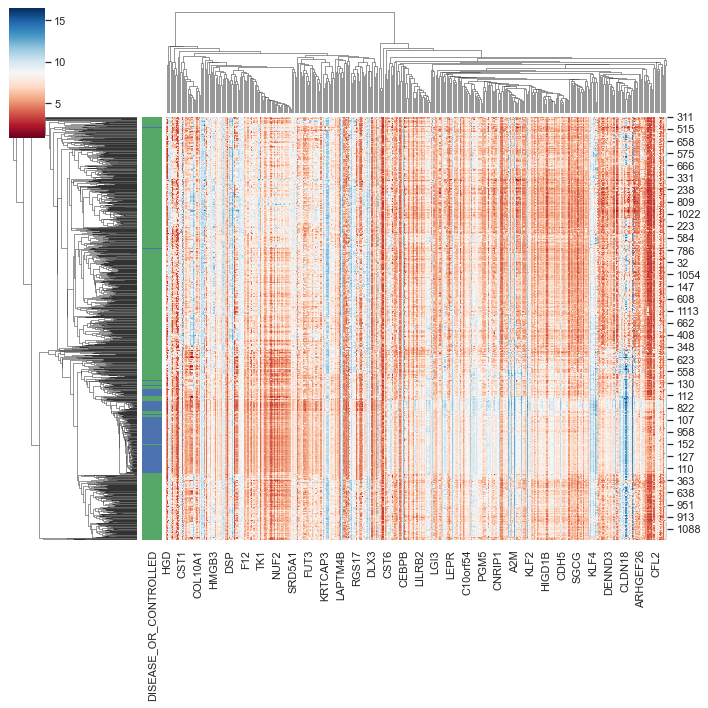

In [6]:

#green = 0 (NSCLC)
#blue = 1 (Normal)
color_dict=dict(zip(np.unique(y),np.array(['g','b'])))
target_df = pd.DataFrame({"DISEASE_OR_CONTROLLED":y})
row_colors = target_df.DISEASE_OR_CONTROLLED.map(color_dict)

ax = sns.clustermap(x,
               metric="correlation",
               row_colors=row_colors, cmap='RdBu')
ax.savefig('./WGCNA Analysis/genevscolors/overall_clustermap.png', dpi=500)

### turquoise colored genes selected by WGCNA

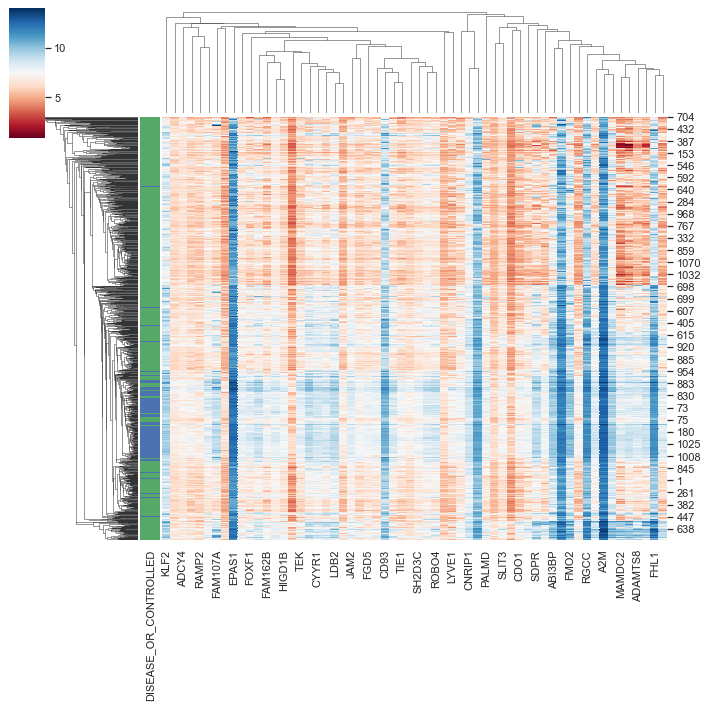

In [7]:

#green = 0 (NSCLC)
#blue = 1 (Normal)

color_dict=dict(zip(np.unique(y),np.array(['g','b'])))
target_df = pd.DataFrame({"DISEASE_OR_CONTROLLED":y})
row_colors = target_df.DISEASE_OR_CONTROLLED.map(color_dict)

ax = sns.clustermap(train_turquoise,
               metric="correlation",
               row_colors=row_colors, cmap='RdBu')
ax.savefig('./WGCNA Analysis/genevscolors/turquoise.png', dpi=500)

### blue colored genes selected by WGCNA

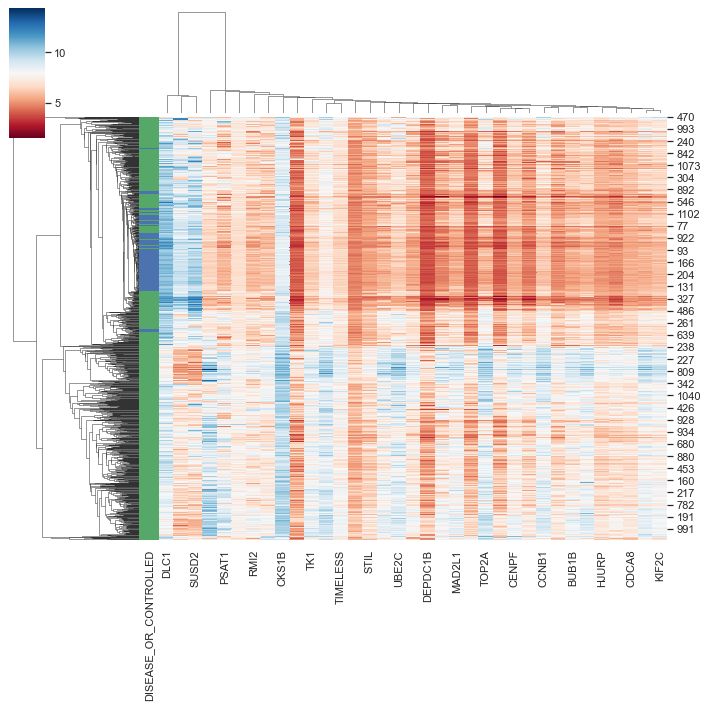

In [8]:

#green = 0 (NSCLC)
#blue = 1 (Normal)
color_dict=dict(zip(np.unique(y),np.array(['g','b'])))
target_df = pd.DataFrame({"DISEASE_OR_CONTROLLED":y})
row_colors = target_df.DISEASE_OR_CONTROLLED.map(color_dict)

ax = sns.clustermap(train_blue,
               metric="correlation",
               row_colors=row_colors, cmap='RdBu')
ax.savefig('./WGCNA Analysis/genevscolors/blue.png', dpi=500)

### grey colored genes selected by WGCNA

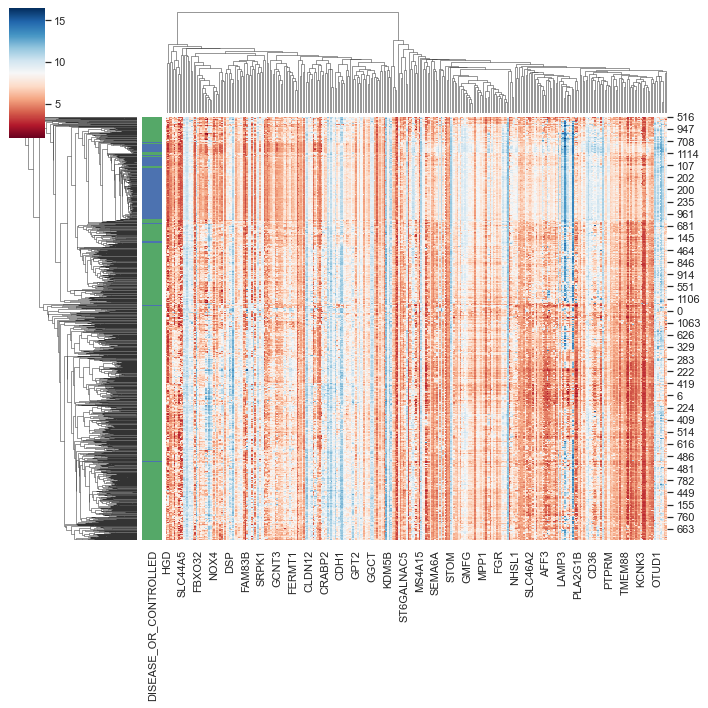

In [9]:

#green = 0 (NSCLC)
#blue = 1 (Normal)
color_dict=dict(zip(np.unique(y),np.array(['g','b'])))
target_df = pd.DataFrame({"DISEASE_OR_CONTROLLED":y})
row_colors = target_df.DISEASE_OR_CONTROLLED.map(color_dict)

ax = sns.clustermap(train_grey,
               metric="correlation",
               row_colors=row_colors, cmap='RdBu')
ax.savefig('./WGCNA Analysis/genevscolors/grey.png', dpi=500)